# CNN - Simple Architecture

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
# from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-11-06 22:06:54.902670: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-06 22:06:54.911969: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730948814.922229   18830 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730948814.925289   18830 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-06 22:06:54.936528: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Preparation for trainning - Train Split

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 6106 files for training.


I0000 00:00:1730948818.659612   18830 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [5]:
classes_ = train_ds.class_names
len(classes_)

8

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image After Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 7632 files belonging to 8 classes.
Using 1526 files for validation.


In [7]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds, val_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Preparation for trainning - Test Split

In [8]:
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 170 files for training.


In [9]:
val_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32,
)

Found 212 files belonging to 8 classes.
Using 42 files for validation.


In [10]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds_test = train_ds_test.map(normalize)
val_ds_test = val_ds_test.map(normalize)

train_ds_test, val_ds_test

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Training

In [11]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', kernel_initializer="HeNormal",input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer="HeNormal"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [13]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/50


I0000 00:00:1730948820.934629   18929 service.cc:148] XLA service 0x7f82f000bad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730948820.935032   18929 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-06 22:07:01.017979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730948821.222175   18929 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1730948824.526954   18929 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.3071 - loss: 2.5286 - val_accuracy: 0.4318 - val_loss: 1.4765
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5479 - loss: 1.2079 - val_accuracy: 0.6835 - val_loss: 0.9212
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8380 - loss: 0.5013 - val_accuracy: 0.8401 - val_loss: 0.5086
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9627 - loss: 0.1515 - val_accuracy: 0.8729 - val_loss: 0.4624
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9874 - loss: 0.0559 - val_accuracy: 0.9063 - val_loss: 0.3682
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9953 - loss: 0.0254 - val_accuracy: 0.9207 - val_loss: 0.3570
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9958 - loss: 0.0153 - val_accuracy: 0.9115 - val_loss: 0.4094
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9977 - loss: 0.0117 - val_accuracy: 0.93

# Evaluating

In [14]:
history.history

{'accuracy': [0.357844740152359,
  0.621028482913971,
  0.8799541592597961,
  0.9677366614341736,
  0.9911562204360962,
  0.996888279914856,
  0.9960694313049316,
  0.9975433945655823,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.8698011636734009,
  1.040091872215271,
  0.39104795455932617,
  0.12839356064796448,
  0.04374442249536514,
  0.01880311220884323,
  0.015126857906579971,
  0.011980831623077393,
  0.002345388988032937,
  0.0009125051437877119,
  0.0006295780185610056,
  0.000489565369207412,
  0.0003923384356312454,
  0.0003198710619471967,
  0.0002671308466233313,
  0.00022528116824105382,
  0.00019185757264494896,
  0.0001647423196118325,
  0.00014216676936484873,
  0.00012272941239643842,
  0.00010672517964849249,
 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,932,922 (68.41 MB)

 Trainable params: 5,977,640 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,955,282 (45.61 MB)

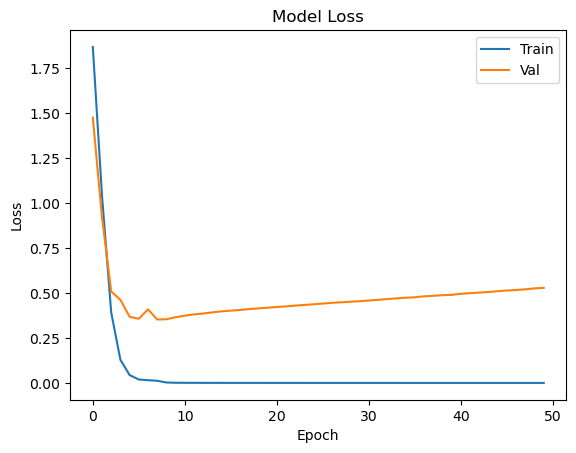

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

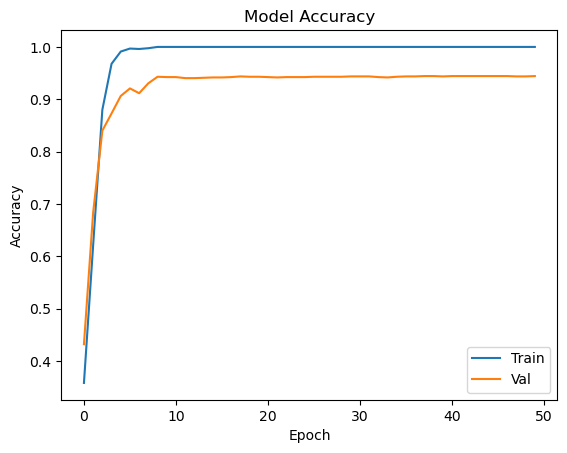

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

48/48 - 0s - 7ms/step - accuracy: 0.9443 - loss: 0.5290


In [19]:
print(test_acc)

0.9442988038063049


In [20]:
predictions = model.predict(train_ds_test)
val_pred = np.argmax(predictions, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [21]:
y_true = []
y_pred = []
for images, labels in val_ds_test:
  # Make predictions on the batch
  batch_pred = model.predict(images)
  y_pred.extend(list(batch_pred.argmax(axis=1)))  # Predicted labels
  y_true.extend(list(labels.numpy()))  # True labels from the batch

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


2024-11-06 22:10:50.919117: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


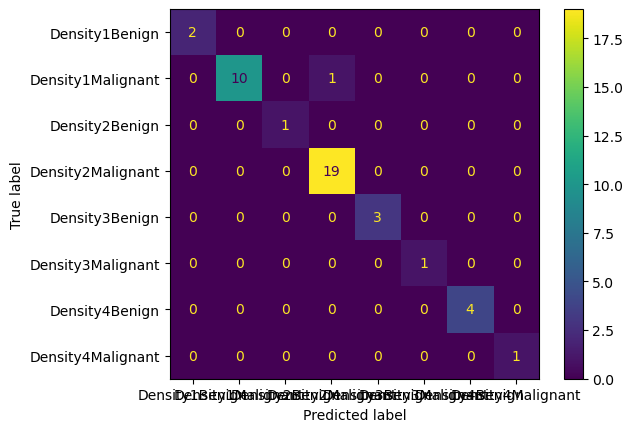

In [22]:
disp = ConfusionMatrixDisplay(cm, display_labels=classes_,)
disp.plot()

In [23]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         1
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.98        42
   macro avg       0.99      0.99      0.99        42
weighted avg       0.98      0.98      0.98        42



# Test

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = 'Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 224x224/Density2Benign/20586960.png'

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = x / 255.0  
x = np.expand_dims(x, axis=0)  

preds = model.predict(x)
predicted_class_index = np.argmax(preds[0])

class_labels = classes_  
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Predicted class: Density2Benign


# Save

In [26]:
model.save('models/breast_cancer_classification-sa.h5')